# <center> <span style="color:#f26a81">CP321 Final Project</span></center> 
***
#### <center> Data Visualization </center> 
#### <center>Dr. Jiashu (Jessie) Zhao </center> 
#### <center>Winter 2024 </center>
 #### <center>Authors: Anousheh Shahid (210179080), Maham Farooq (200498180), Razan Mohamed (169035150)</center>





# <center> <span style="color:#f26a81">Introduction and Motivation</span></center> 
***
During the COVID-19 pandemic, vaccinations were a crucial weapon in safeguarding public health. As vaccination efforts still progress to this day, it's important to understand how effective these vaccines are in preventing cases across multiple age groups. Our project focuses on understanding the relationship between vaccination rates and COVID-19 cases within specific age groups in Ontario, Canada.

Our motivation for this study came from the curiosity of understanding how effective these vaccination campaigns were throughout the pandemic. While many vaccines were distributed across Ontario, the number of doses taken varied across age groups. This raised the question of how effective these vaccines were in battling the COVID-19 pandemic. By comparing two data sets about confirmed positive COVID-19 cases and vaccination rates among different age cohorts, we want to find out whether there is a connection between higher vaccination rates and a decrease in COVID-19 cases within the same age group.

We believe our findings will be very useful for Public Health Ontario and the general public in knowing how important vaccinations are. If there is a strong correlation between vaccination rates and reduced COVID-19 cases within specific age groups, it would prove the effectiveness of vaccination campaigns. If there is no correlation, then this would force Public Health Ontario to come up with a better solution in combating COVID-19. Through data visualization and quantitative analysis, we aspire to provide key insights in the fight against COVID-19 in Ontario.


# <center> <span style="color:#f26a81">Methodology</span></center> 
***
 Propose Approach (your question, data set description,
data processing, Visualization Description and Analysis)
### Question: 
Is there a correlation between COVID-19 vaccination rates and COVID-19 cases amongst different age cohorts?
### Data set description: 
We have used two datasets from data.ontario.ca to compare the number of positive COVID-19 cases to vacanation rates by over time. 

### Data Processing




Positive COVID-19 Cases over Time Dataset source: Government of Ontario https://data.ontario.ca/dataset/confirmed-positive-cases-of-covid-19-in-ontario/resource/455fd63b-603d-4608-8216-7d8647f43350 

Vaccination rates by age over Time Dataset source: Government of Ontario

In [2]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
#Preprocessing the first dataset

#load the first dataset
df = pd.read_csv('vaccines_by_age.csv')


#Filter the data by date range
start_date = '2021-01-01'
end_date = '2024-03-01'

df['Date'] = pd.to_datetime(df['Date'])  
m = (df['Date'] > start_date) & (df['Date'] <= end_date)
df = df.loc[m]
#Remove incomplete/unclear values and filter the age range
df = df.drop(df[(df['Agegroup'] == 'Undisclosed_or_missing') | (df['Agegroup'] == 'Adults_18plus') | (df['Agegroup'] == 'Ontario_12plus') |(df['Agegroup'] == 'Ontario_5plus')| (df['Agegroup'] == '05-11yrs')  | (df['Agegroup'] == '12-17yrs')  | (df['Agegroup'] == '18-29yrs')].index)
#Group by age

df.head(20)

#--------------------------------------------------------------------------
#Preprocessing the Second Dataset 

#load the second dataset
df2 = pd.read_csv('conposcovidloc.csv')

#Filter the data by date range
df2['Case_Reported_Date'] = pd.to_datetime(df2['Case_Reported_Date'])  
m = (df2['Case_Reported_Date'] > start_date) & (df2['Case_Reported_Date'] <= end_date  ) & (df2['Accurate_Episode_Date'] > start_date)  
df2 = df2.loc[m]
#Remove incomplete values and filter the age range
df2 = df2.drop(df2[(df2['Case_Reported_Date'] == 'NaN') |(df2['Age_Group'] == '<20') |(df2['Age_Group'] == '20s')].index)
df2.head(15)

,Row_ID,Accurate_Episode_Date,Case_Reported_Date,Test_Reported_Date,Specimen_Date,Age_Group,Client_Gender,Outcome1,Reporting_PHU_ID,Reporting_PHU,Reporting_PHU_Address,Reporting_PHU_City,Reporting_PHU_Postal_Code,Reporting_PHU_Website,Reporting_PHU_Latitude,Reporting_PHU_Longitude
206612,206613,2021-01-02,2021-01-02,NaN,NaN,40s,MALE,NaN,2240,Chatham-Kent Health Unit,435 Grand Avenue West,Chatham,N7M 5L8,www.ckphu.com,42.403861,-82.208561
206613,206614,2021-01-02,2021-01-02,NaN,NaN,50s,FEMALE,NaN,2258,Eastern Ontario Health Unit,1000 Pitt Street,Cornwall,K6J 5T1,www.eohu.ca,45.029152,-74.736298
206614,206615,2021-01-02,2021-01-02,NaN,2021-01-02,30s,FEMALE,NaN,3895,Toronto Public Health,"277 Victoria Street, 5th Floor",Toronto,M5B 1W2,www.toronto.ca/community-people/health-wellnes...,43.656591,-79.379358
206615,206616,2021-01-02,2021-01-02,NaN,2021-01-02,50s,FEMALE,NaN,3895,Toronto Public Health,"277 Victoria Street, 5th Floor",Toronto,M5B 1W2,www.toronto.ca/community-people/health-wellnes...,43.656591,-79.379358
206616,206617,2021-01-02,2021-01-02,NaN,2021-01-11,30s,FEMALE,NaN,3895,Toronto Public Health,"277 Victoria Street, 5th Floor",Toronto,M5B 1W2,www.toronto.ca/community-people/health-wellnes...,43.656591,-79.379358
206617,206618,2021-01-02,2021-01-02,2020-12-30,NaN,70s,MALE,NaN,2268,Windsor-Essex County Health Unit,1005 Ouellette Avenue,Windsor,N9A 4J8,www.wechu.org,42.308796,-83.033670
206619,206620,2021-01-02,2021-01-02,2021-01-02,2020-12-31,40s,FEMALE,NaN,2262,Thunder Bay District Health Unit,999 Balmoral Street,Thunder Bay,P7B 6E7,www.tbdhu.com,48.400572,-89.258851
206626,206627,2021-01-02,2021-01-02,2021-01-02,2021-01-02,30s,FEMALE,NaN,2253,Peel Public Health,7120 Hurontario Street,Mississauga,L5W 1N4,www.peelregion.ca/health/,43.647471,-79.708893
206627,206628,2021-01-02,2021-01-02,2021-01-02,2021-01-02,30s,MALE,NaN,2253,Peel Public Health,7120 Hurontario Street,Mississauga,L5W 1N4,www.peelregion.ca/health/,43.647471,-79.708893
206628,206629,2021-01-02,2021-01-02,2021-01-02,2021-01-02,30s,MALE,NaN,3895,Toronto Public Health,"277 Victoria Street, 5th Floor",Toronto,M5B 1W2,www.toronto.ca/community-people/health-wellnes...,43.656591,-79.379358


This code performs preprocessing on both datasets. For the first dataset (`vaccines_by_age.csv`), it loads the data and filters it based on a specified date range. Then, it removes incomplete or irrelevant entries and filters out specific age groups. Finally, it groups the data by age. The second dataset (`conposcovidloc.csv`) follows a similar procedure, filtering based on date range and removing incomplete entries. It also filters out specific age groups. Both datasets undergo a series of steps to ensure data integrity and relevance before further analysis.

# Time Series of COVID-19 Cases Based on Age and Vaccination Rates

<Figure size 1200x600 with 0 Axes>

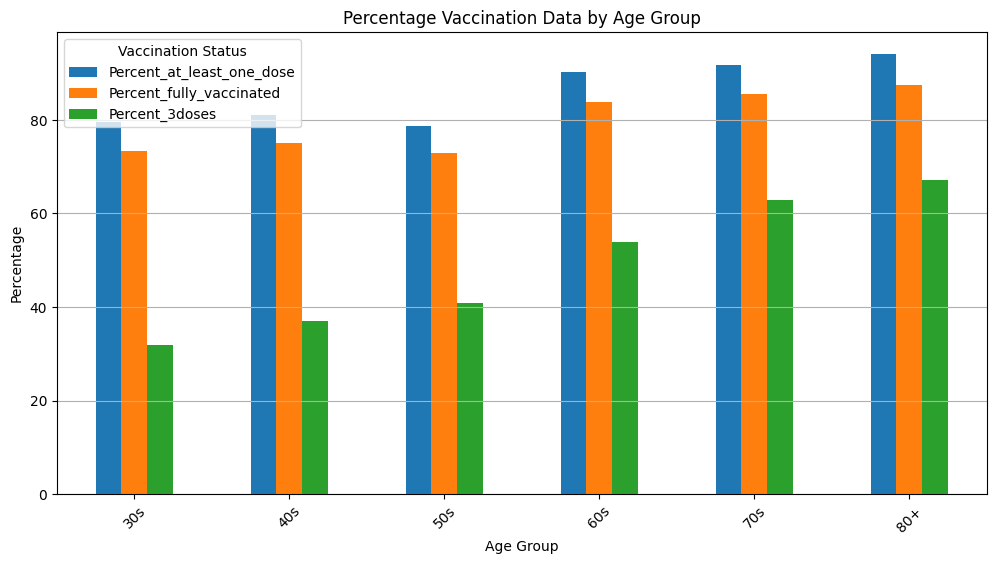

In [9]:
df = df.sort_values('Date')
plt.figure(figsize=(12, 6))

df['Date'] = pd.to_datetime(df['Date'])
percentage_data = df.groupby('Agegroup')[['Percent_at_least_one_dose', 'Percent_fully_vaccinated', 'Percent_3doses']].mean()*100

# Plot bar plot for percentage vaccination data
percentage_data.plot(kind='bar', figsize=(12, 6))


plt.title('Percentage Vaccination Data by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(title='Vaccination Status')
plt.grid(axis='y')
plt.show()

Our first visualization provides insights into vaccination statuses across diverse age groups, focusing on three key categories: individuals with one dose, fully vaccinated (having received two doses), or those who have obtained a third dose. To show the distribution of vaccination uptake across age demographics, we used a bar plot representation.

Upon analysis, there is a clear trend: the highest vaccination status across all age groups is at least one dose, indicating widespread initial vaccination coverage. The percentage of fully vaccinated individuals closely follows, slightly lower than those with one dose. However, the uptake of the third vaccine dose is notably lower than the first two doses, particularly evident among age groups under 70 years of age. In contrast, age groups aged 70 and above exhibit a higher rate of third-dose uptake.

While the lower uptake of the third dose may initially seem surprising, it aligns with policy changes implemented by the Government of Ontario on September 22, 2021. This policy was introduced to manage high-risk public settings where masks cannot be worn at all times, including restaurants, bars, clubs, event spaces, gyms, etc. The mandate required full vaccination and proof of vaccination for access to specific public settings, which led to a significant increase in the percentage of individuals with one and two doses across all age groups. Given that the third dose was recommended but not mandatory, and initially targeted vulnerable populations, this resulted in a higher uptake among age groups over 70 years of age.isk.

# Quarterly Heatmap of COVID-19 Case Counts and Percentage of Fully Vaccinated by Age Group

In [10]:
# Preprocessing to show dates quarterly for both dataset
df['Date'] = pd.to_datetime(df['Date']) # Vaccines
df['Quarter'] = df['Date'].dt.to_period('Q')

df2['Case_Reported_Date'] = pd.to_datetime(df2['Case_Reported_Date']) # Covid Cases
df2['Quarter'] = df2['Case_Reported_Date'].dt.to_period('Q')

This preprocessing code organizes dates into quarterly periods for two datasets. For the first dataset, it converts the 'Date' column into datetime format using `pd.to_datetime`, then creates a new 'Quarter' column to represent the quarter of the year each date falls into using `.dt.to_period('Q')`. Similarly, for the second dataset, it follows the same procedure, converting the 'Case_Reported_Date' column into datetime format and creating a corresponding 'Quarter' column to categorize the dates into quarterly periods. This allows for easier analysis and visualization of the data based on quarterly trends.

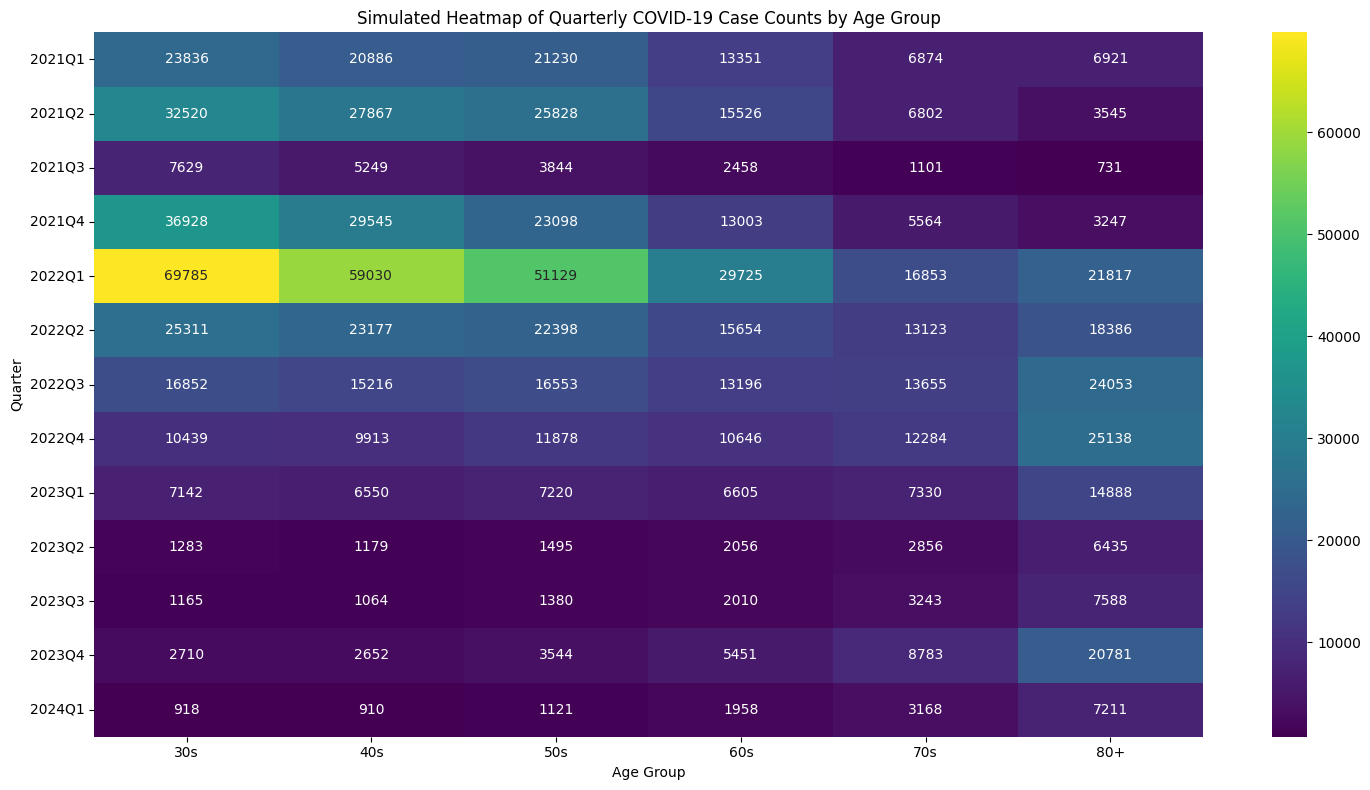

In [11]:
## Heatmap showcasing the sum of covid positive cases per age group every qaurter 

# cumulative covid case counts per age group for each quarter
case_counts_by_quarter = df2.groupby(['Age_Group', 'Quarter']).size().reset_index(name='Case_Counts')

# Pivot data for heatmap
case_counts_quarterly_pivot = case_counts_by_quarter.pivot(index='Quarter', columns='Age_Group', values='Case_Counts').fillna(0)
 
# plot heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(case_counts_quarterly_pivot, cmap='viridis', annot=True, fmt="d")
plt.title('Simulated Heatmap of Quarterly COVID-19 Case Counts by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Quarter')
plt.tight_layout() 
plt.show()

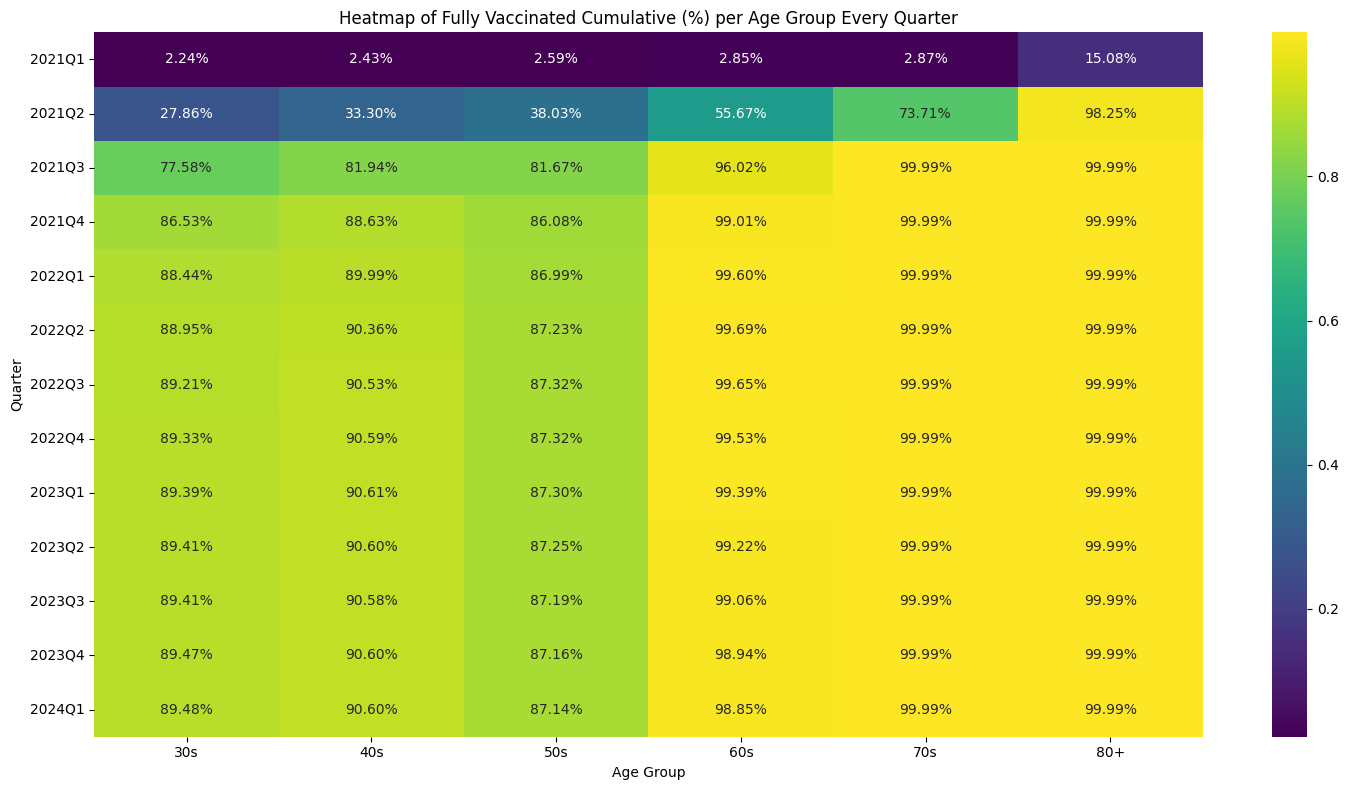

In [12]:
## Heatmap showcasing the percentage fully vaccinated people per age group every qaurter 

# fully_vaccinated_cumulative for each age group per quarter
quarter_vacc = df.groupby(['Agegroup', 'Quarter'])['Percent_fully_vaccinated'].last().reset_index()

# Pivot data for heatmap
quarterly_pivot = quarter_vacc.pivot(index='Quarter', columns='Agegroup', values='Percent_fully_vaccinated').fillna(0)

# Generate the heatmap for quarterly vaccination rates
plt.figure(figsize=(15, 8))
sns.heatmap(quarterly_pivot, cmap='viridis', annot=True,fmt='.2%')  # Changed fmt to ".1f" for decimal formatting
plt.title('Heatmap of Fully Vaccinated Cumulative (%) per Age Group Every Quarter')
plt.xlabel('Age Group')
plt.ylabel('Quarter')
plt.tight_layout()
plt.show()


In [13]:
# function to return matching age groups - Convert the first format ('30-39yrs') to the second format ('30s')
def convert_age_group_format(age_group):
    if  age_group == '80s' or age_group.startswith('90'):
        return '80+'
    elif age_group.endswith('yrs'):
        return age_group[:2] + 's'
    elif age_group == 'UNKNOWN':
        return None
    else:
        return age_group

df['Agegroup'] = df['Agegroup'].apply(convert_age_group_format)
df2['Age_Group'] = df2['Age_Group'].apply(convert_age_group_format)

df = df[df['Agegroup'].notna()]
df2 = df2[df2['Age_Group'].notna()]

print("Unique Age Groups in Vaccination Data:", df['Agegroup'].unique())
print("Unique Age Groups in Case Data:", df2['Age_Group'].unique())


Unique Age Groups in Vaccination Data: ['30s' '40s' '50s' '60s' '70s' '80+']
Unique Age Groups in Case Data: ['40s' '50s' '30s' '70s' '60s' '80+']


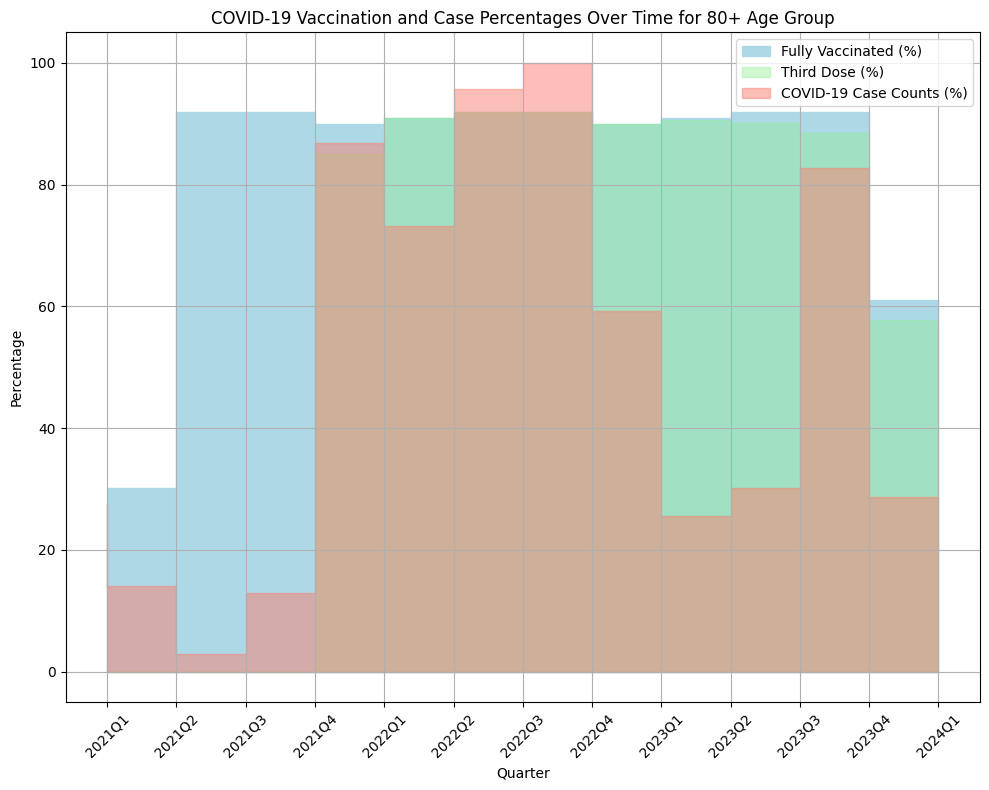

In [14]:
## Normalized Stacked Area Chart showcasing fully vaccinated people and covid cases over time for people aged 80 and over 

# Filter for 80+ age group and aggregate data
vaccination_data = df[df['Agegroup'] == '80+'].groupby('Quarter')['Percent_fully_vaccinated'].sum().reset_index()
vaccination_data_3 = df[df['Agegroup'] == '80+'].groupby('Quarter')['Percent_3doses'].sum().reset_index()
case_data = df2[df2['Age_Group'] == '80+'].groupby('Quarter').size().reset_index(name='Case_Counts')

# Normalize case counts to the maximum count across quarters for a percentage scale
max_cases = case_data['Case_Counts'].max()
case_data['Case_Counts_Percent'] = (case_data['Case_Counts'] / max_cases) * 100

# plot
plt.figure(figsize=(10, 8))

# Area plot for vaccine and case data
plt.fill_between(vaccination_data['Quarter'].astype(str), vaccination_data['Percent_fully_vaccinated'], label='Fully Vaccinated (%)', color='lightblue', step='pre')
# im being extra with the 3rd dose lol but we can keep it if it helps the argument or omit it if it looks too messy or doesn't help our case
plt.fill_between(vaccination_data_3['Quarter'].astype(str), vaccination_data_3['Percent_3doses'], label='Third Dose (%)', color='lightgreen', step='pre',alpha=0.4)
plt.fill_between(case_data['Quarter'].astype(str), case_data['Case_Counts_Percent'], label='COVID-19 Case Counts (%)', color='salmon', step='pre', alpha=0.5)

plt.title('COVID-19 Vaccination and Case Percentages Over Time for 80+ Age Group')
plt.xlabel('Quarter')
plt.ylabel('Percentage')
plt.xticks(rotation=45)  
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
